# Machine Learning


### BEST FIT LINE - Calling SKlearn linear regression


In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('auto-mpg.csv',delim_whitespace=True,names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accelaration', 'model year', 'origin', 'car name'])

In [4]:
y = df['mpg']
X = df['accelaration']

### Univariate Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape

(318,)

In [8]:
X_train = np.asarray(X_train).reshape(-1,1)
X_test = np.asarray(X_test).reshape(-1,1)
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [9]:
X_train.shape,X_test.shape

((318, 1), (80, 1))

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
model.coef_,model.intercept_

(array([[1.14527754]]), array([5.77195738]))

In [12]:
model.predict(X_test)

array([[22.37848171],
       [21.80584294],
       [18.37001032],
       [28.10486942],
       [22.37848171],
       [25.81431434],
       [25.24167557],
       [27.53223065],
       [24.09639803],
       [27.76128616],
       [20.08792663],
       [22.95112049],
       [27.53223065],
       [18.37001032],
       [18.94264909],
       [21.80584294],
       [26.04336984],
       [28.21939717],
       [24.6690368 ],
       [26.38695311],
       [23.75281476],
       [24.55450904],
       [23.52375926],
       [25.24167557],
       [27.30317514],
       [19.51528786],
       [22.95112049],
       [23.63828701],
       [32.91503509],
       [22.37848171],
       [20.08792663],
       [21.23320417],
       [26.27242535],
       [20.6605654 ],
       [22.60753722],
       [28.10486942],
       [19.74434337],
       [24.55450904],
       [26.61600861],
       [26.50148086],
       [25.47073107],
       [22.37848171],
       [26.1578976 ],
       [25.81431434],
       [25.24167557],
       [27

In [13]:
model.score(X_test,y_test)

0.19000991879661244

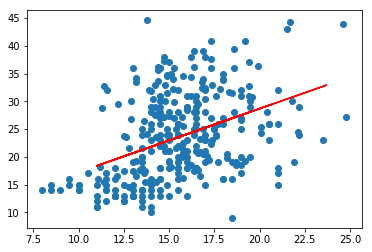

In [14]:
plt.scatter(X_train,y_train)
plt.plot(X_test,model.predict(X_test),'r')

### Multivariate Regression

In [15]:
import math

In [16]:
df = pd.read_csv('auto-mpg.csv',delim_whitespace=True,names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accelaration', 'model year', 'origin', 'car name'])
y = df['mpg']
X = df['accelaration']

In [23]:
X_train = np.asarray(X)
y_train = np.asarray(y)

In [55]:
m = 0
c = 0
iterations = 1000
learning_rate = 0.0001

In [28]:
# Error function or Cost function
def CostFunction(m, c, X_train, y_train) : 
    summation = 0
    for x,y in zip(X_train, y_train) : 
        summation += (y - (m*x + c))**2
    return summation/float(2*len(X_train)) 

In [35]:
#This function will take in learning_rate,training xs(X_train) and ys(y_train)
#This function will return new m and c for every iteration over the entire training set
#The greater the number of iterations the better the fitting
def GradientDescent(m, c, learning_rate,X_train, y_train) : 
    #global m
    #global c
    dev_c = 0#Derivative of Cost Function wrt c
    dev_m = 0#Derivative of Cost Function wrt m
    ratio = 2/(float(len(X_train)))
    #Iterating over the entire training set
    for x,y in zip(X_train,y_train) : 
        dev_c += (y - (m*x + c) )*(-1)*ratio
        dev_m += (y - (m*x + c) )*(-x)*ratio
    #Now we set the new value of c and m as : 
    c = c - dev_c*learning_rate
    m = m - dev_m*learning_rate
    return m,c

In [32]:
# Step Gradient function
def StepGradient(iterations, m, c, X_train, y_train, learning_rate) : 
    for i in range(iterations) : 
        m,c = GradientDescent(m, c, learning_rate, X_train, y_train)
        error = CostFunction(m, c, X_train, y_train)    
    return m,c,error

In [56]:
m,c,error = StepGradient(iterations, m, c, X_train, y_train, learning_rate)

In [57]:
m, c, error

(1.4931509862180814, 0.12252253313266287, 25.44263658593405)

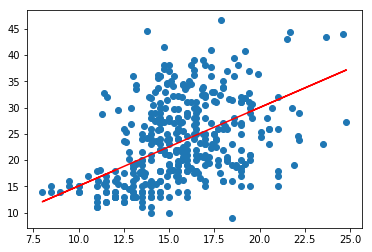

In [58]:
plt.scatter(X_train,y_train)
plt.plot(X_train,m*X_train+c,'r')

## Upon several modifications, above is the best result that I got